In [113]:
import requests
import json
from weather_config import api_key
from pprint import pprint
from pprint import pprint
import random as rd
from citipy import citipy
import matplotlib.pyplot as plt
import statistics as stats
from scipy import stats


c168b9a9ffc66a21998e820298fa389b


In [82]:

lats = []
lons = []
temps = []
humids = []
clouds = []
winds = []
cities = []
countries = []

for i in range(0, 600):
    lat = rd.randrange(-9000,9000) / 100
    lon = rd.randrange(-18000,18000) / 100
    city = citipy.nearest_city(lat, lon)
    city_name = city.city_name
    country = city.country_code
    if city_name not in cities:
        lats.append(lat)
        lons.append(lon)
        cities.append(city_name)
        countries.append(country)    
        url = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={api_key}"
        response = requests.get(url)
        resp_json = response.json()
        #city_name = resp_json['city']['name']
        #country = resp_json['city']['country']
        temp = round((resp_json['current']['temp'] - 273) * 1.8 + 32,2)
        humid = resp_json['current']['humidity']
        cloud = resp_json['current']['clouds']
        wind = resp_json['current']['wind_speed']
        temps.append(temp)
        humids.append(humid)
        clouds.append(cloud)
        winds.append(wind)
print(len(lats))
print(len(lons))
print(len(temps))
print(len(humids))
print(len(clouds))
print(len(winds))

313
313
313
313
313
313


313
313
313
313
313
313
313
313


In [90]:
import pandas as pd
weather_dict = {
    'city' : cities ,
    'country' : countries ,
    'lat' : lats ,
    'lon' : lons ,
    'temp' : temps ,
    'humid' : humids ,
    'clouds' : clouds ,
    'winds' : winds    }
weather_df = pd.DataFrame(weather_dict)
print(weather_df.head())



        city country    lat     lon   temp  humid  clouds  winds
0   acapulco      mx   8.19 -102.88  79.92     82      45   5.46
1  novo selo      mk  41.47   22.82  66.38     87      78   0.34
2   cherskiy      ru  72.38  158.52  48.47     81      35   4.78
3    rikitea      pf -49.11 -138.32  43.56     82       0   5.74
4  churapcha      ru  61.68  132.69  73.40     42      48   3.68


In [96]:
weather_df['lat']


0       8.19
1      41.47
2      72.38
3     -49.11
4      61.68
       ...  
308   -20.68
309    14.72
310   -24.48
311    31.89
312    38.97
Name: lat, Length: 313, dtype: float64

Text(0, 0.5, 'Temperature (F)')

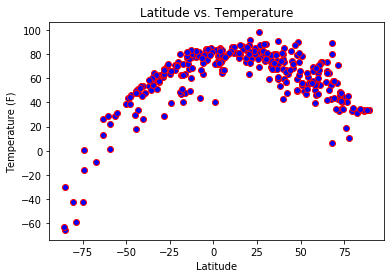

In [101]:
plt.scatter( weather_df['lat'] , weather_df['temp'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

Text(0, 0.5, 'Humidity (%)')

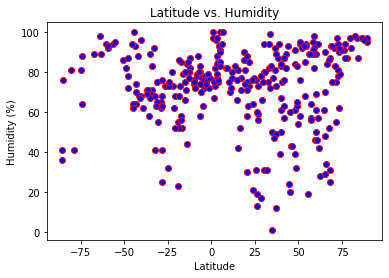

In [102]:
plt.scatter( weather_df['lat'] , weather_df['humid'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

Text(0, 0.5, 'Clouds (%)')

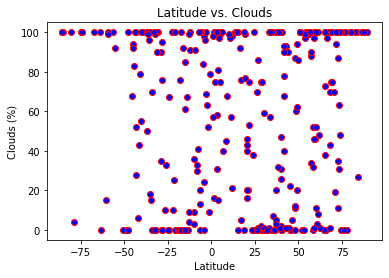

In [103]:
plt.scatter( weather_df['lat'] , weather_df['clouds'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Clouds")
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")

Text(0, 0.5, 'Wind Speed')

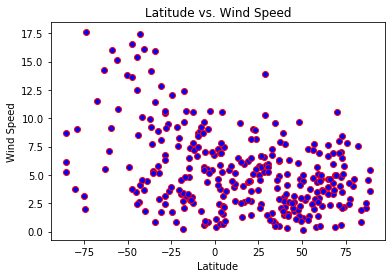

In [104]:
plt.scatter( weather_df['lat'] , weather_df['winds'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [105]:
weather_df_NH = weather_df.loc[(weather_df['lat'] < 0)]
weather_df_SH = weather_df.loc[(weather_df['lat'] > 0)]

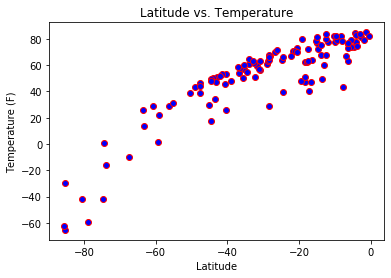

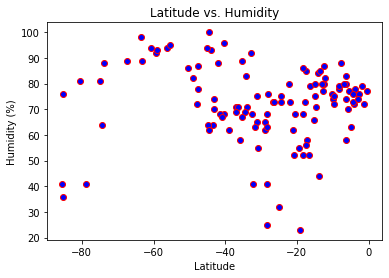

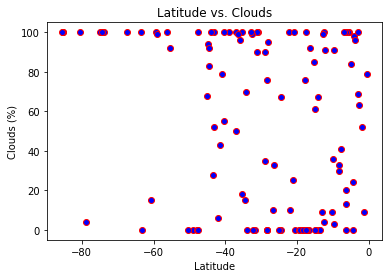

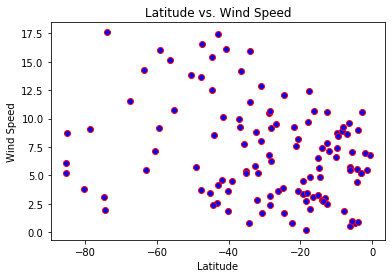

In [107]:
plt.scatter( weather_df_NH['lat'] , weather_df_NH['temp'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

plt.scatter( weather_df_NH['lat'] , weather_df_NH['humid'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

plt.scatter( weather_df_NH['lat'] , weather_df_NH['clouds'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Clouds")
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.show()

plt.scatter( weather_df_NH['lat'] , weather_df_NH['winds'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()


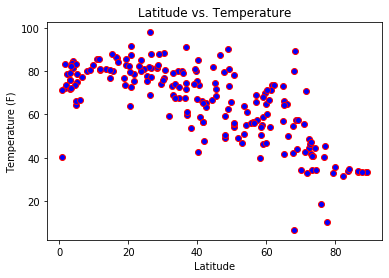

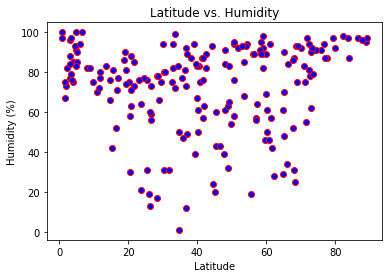

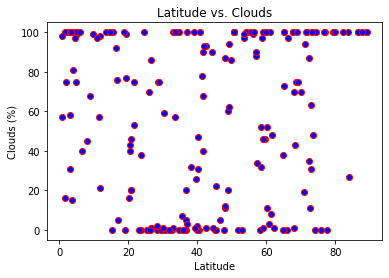

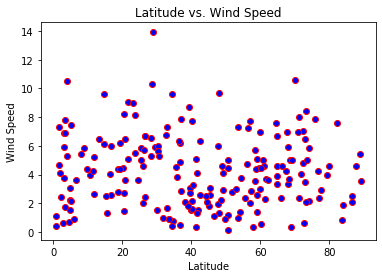

In [108]:
plt.scatter( weather_df_SH['lat'] , weather_df_SH['temp'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

plt.scatter( weather_df_SH['lat'] , weather_df_SH['humid'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

plt.scatter( weather_df_SH['lat'] , weather_df_SH['clouds'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Clouds")
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.show()

plt.scatter( weather_df_SH['lat'] , weather_df_SH['winds'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()




In [115]:
tempNH_slope, tempNH_int, tempNH_r, tempNH_p, tempNH_std_err = stats.linregress( weather_df_NH['lat'] , weather_df_NH['temp'] )
tempSH_slope, tempSH_int, tempSH_r, tempSH_p, tempSH_std_err = stats.linregress( weather_df_SH['lat'] , weather_df_SH['temp'] )

In [116]:
tempNH_fit = tempNH_slope * weather_df_NH['lat'] + tempNH_int
tempSH_fit = tempSH_slope * weather_df_SH['lat'] + tempSH_int

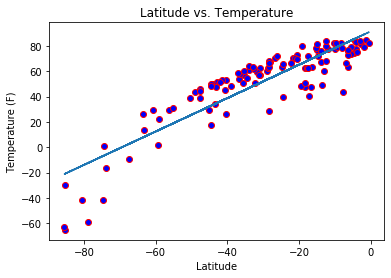

R-squared = 0.79


In [132]:
plt.scatter( weather_df_NH['lat'] , weather_df_NH['temp'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.plot( weather_df_NH['lat'] , tempNH_fit,"--")
plt.show()
print(f"R-squared = {round(tempNH_r**2,2)}")

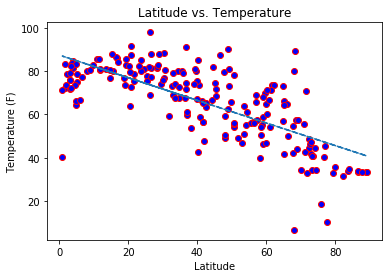

R-squared = 0.52


In [133]:
plt.scatter( weather_df_SH['lat'] , weather_df_SH['temp'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.plot( weather_df_SH['lat'] , tempSH_fit,"--")
plt.show()
print(f"R-squared = {round(tempSH_r**2,2)}")